In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv('datasets/obesity/obesity.csv')

In [2]:
# convert object values into numeric ones
gender_map = {'Female': 0, 'Male': 1}
FHWO_map = {'no': 0, 'yes': 1}
FAVC_map = {'no': 0, 'yes': 1}
CAEC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
SMOKE_map = {'no': 0, 'yes': 1}
SCC_map = {'no': 0, 'yes': 1}
CALC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
MTRANS_map = {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Automobile': 3, 'Public_Transportation': 4}
NObeyesdad_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4,'Obesity_Type_II': 5,'Obesity_Type_III': 6}

data['Gender'] = data['Gender'].map(gender_map)
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(FHWO_map)
data['FAVC'] = data['FAVC'].map(FAVC_map)
data['CAEC'] = data['CAEC'].map(CAEC_map)
data['SMOKE'] = data['SMOKE'].map(SMOKE_map)
data['SCC'] = data['SCC'].map(SCC_map)
data['CALC'] = data['CALC'].map(CALC_map)
data['MTRANS'] = data['MTRANS'].map(MTRANS_map)
data['NObeyesdad'] = data['NObeyesdad'].map(NObeyesdad_map)

In [12]:
# check the data after changes
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,4,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,4,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,4,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,4,3


In [3]:
# Separate the features and target variables
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Task 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Cross-validation with 10 folds
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores (Negative Mean Squared Error):")
print(scores)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Negative MSE: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")

print("\n------------------------\n")

# Mean Squared Error -> MSE = Σ(y_pred - y_true)^2 / n
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Print the model coefficients
print("\nModel Coefficients:")
print(lin_reg.coef_)

# Print the model intercept
print(f"Model Intercept: {lin_reg.intercept_:.2f}")

Cross-Validation Scores (Negative Mean Squared Error):
[-0.28483874 -0.32862031 -0.21768321 -0.15188788 -0.10561257 -0.10004833
 -0.18042343 -0.08273973 -0.29717216 -0.54990872]
Mean Negative MSE: -0.23
Standard Deviation: 0.14

------------------------

Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R-squared: 0.95

Model Coefficients:
[ 5.80854907e-02  1.50811832e-02 -7.49969297e+00  7.75097798e-02
  3.09762175e-01  2.94145976e-02  1.83008595e-03  2.48321078e-02
 -1.43516456e-01 -2.29064277e-02 -1.24646282e-02 -9.58051145e-02
 -8.34423565e-02  2.65237373e-03 -6.82270582e-02  4.97147751e-02]
Model Intercept: 8.56


In [4]:
import random

# Select a few random indices from the test set
random_indices = random.sample(range(len(y_test)), 15)

for i in random_indices:
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    print(f"Actual Value: {actual_value:.2f}, Predicted Value: {predicted_value:.2f}")

Actual Value: 4.00, Predicted Value: 4.10
Actual Value: 1.00, Predicted Value: 0.72
Actual Value: 3.00, Predicted Value: 2.77
Actual Value: 6.00, Predicted Value: 5.46
Actual Value: 2.00, Predicted Value: 2.67
Actual Value: 3.00, Predicted Value: 2.97
Actual Value: 2.00, Predicted Value: 2.15
Actual Value: 6.00, Predicted Value: 5.48
Actual Value: 1.00, Predicted Value: 0.63
Actual Value: 1.00, Predicted Value: 1.02
Actual Value: 1.00, Predicted Value: 0.79
Actual Value: 5.00, Predicted Value: 4.60
Actual Value: 0.00, Predicted Value: 0.14
Actual Value: 4.00, Predicted Value: 4.15
Actual Value: 2.00, Predicted Value: 2.54


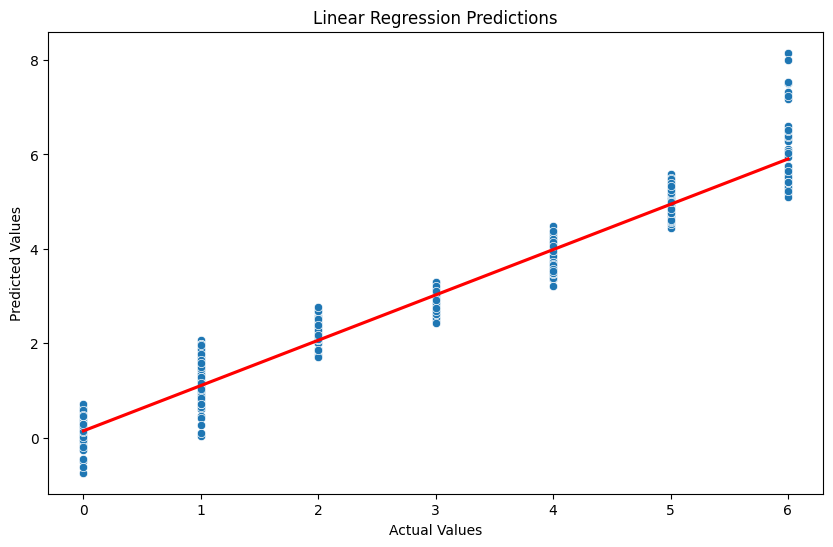

In [5]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Add a regression line
sns.regplot(x=y_test, y=y_pred, ci=None, scatter=False, color='red')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')

# Show the plot
plt.show()

In [17]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=3)
lin_reg_pca = make_pipeline(pca, LinearRegression())

# Fit the pipeline on the training data
lin_reg_pca.fit(X_train, y_train)

# Make predictions on the test data
y_pred_pca = lin_reg_pca.predict(X_test)

# Cross-validation with 10 folds
scores_pca = cross_val_score(lin_reg_pca, X, y, cv=10, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores with PCA (Negative Mean Squared Error):")
print(scores_pca)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Negative MSE: {np.mean(scores_pca):.2f}")
print(f"Standard Deviation: {np.std(scores_pca):.2f}")

print("\n------------------------\n")

# Mean Squared Error -> MSE = Σ(y_pred - y_true)^2 / n
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Mean Squared Error (with PCA): {mse_pca:.2f}")

# Root Mean Squared Error
rmse_pca = np.sqrt(mse_pca)
print(f"Root Mean Squared Error (with PCA): {rmse_pca:.2f}")

# R-squared (Coefficient of Determination)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"R-squared (with PCA): {r2_pca:.2f}")

Cross-Validation Scores with PCA (Negative Mean Squared Error):
[-0.62019664 -0.53578815 -0.48088951 -0.40826944 -0.3818696  -0.54349836
 -0.5860707  -0.40230714 -0.54923525 -0.99897119]
Mean Negative MSE: -0.55
Standard Deviation: 0.17

------------------------

Mean Squared Error (with PCA): 0.48
Root Mean Squared Error (with PCA): 0.69
R-squared (with PCA): 0.88


In [18]:
# Separate the features and target variables
X = data.drop(['NObeyesdad', 'Gender', 'NCP', 'SMOKE'], axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Task: Linear Regression with dropped features
lin_reg_dropped = LinearRegression()
lin_reg_dropped.fit(X_train, y_train)
y_pred_dropped = lin_reg_dropped.predict(X_test)

# Cross-validation with 10 folds
scores_dropped = cross_val_score(lin_reg_dropped, X, y, cv=10, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores with Dropped Features (Negative Mean Squared Error):")
print(scores_dropped)

# Calculate the mean and standard deviation of the cross-validation scores
print(f"Mean Negative MSE: {np.mean(scores_dropped):.2f}")
print(f"Standard Deviation: {np.std(scores_dropped):.2f}")

print("\n------------------------\n")

# Mean Squared Error -> MSE = Σ(y_pred - y_true)^2 / n
mse_dropped = mean_squared_error(y_test, y_pred_dropped)
print(f"Mean Squared Error (with Dropped Features): {mse_dropped:.2f}")

# Root Mean Squared Error
rmse_dropped = np.sqrt(mse_dropped)
print(f"Root Mean Squared Error (with Dropped Features): {rmse_dropped:.2f}")

# R-squared (Coefficient of Determination)
r2_dropped = r2_score(y_test, y_pred_dropped)
print(f"R-squared (with Dropped Features): {r2_dropped:.2f}")

Cross-Validation Scores with Dropped Features (Negative Mean Squared Error):
[-0.27748017 -0.33272278 -0.21726042 -0.14900422 -0.10464264 -0.09872525
 -0.15893288 -0.08259391 -0.30294066 -0.55019783]
Mean Negative MSE: -0.23
Standard Deviation: 0.14

------------------------

Mean Squared Error (with Dropped Features): 0.18
Root Mean Squared Error (with Dropped Features): 0.43
R-squared (with Dropped Features): 0.95
